# Plot RNase protection assay

# Introduction

## Imports

In [1]:
import sys
import os
import time

import numpy as np
import scipy
import pandas as pd

%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns

## Set output parameters

In [2]:
# Set pandas display options
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

# Set plot display options
FONTSIZE = 8  # universal fontsize
params = {
    'font.size': FONTSIZE,
    'axes.titlesize': FONTSIZE,
    'axes.labelsize': FONTSIZE,
    'legend.fontsize': FONTSIZE,
    'xtick.labelsize': FONTSIZE,
    'ytick.labelsize': FONTSIZE,
    'font.family': "Helvetica",
    'mathtext.fontset': 'custom',
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.dpi': 300
   }
mpl.rcParams.update(params)
sns.set_style("ticks", {'axes.grid' : False})

# Set plot output options
output_dir = "outs/qPCR_RNase_protection"
output_suffix = ""
output_formats = [".png", ".pdf"]

mpl.rc('savefig', dpi=300)

# Define convenience function for saving figures

savefig = True
savefig_args = {"dpi": 300, "bbox_inches": "tight", "pad_inches": 0.1}

def save_figure(fig, name, output_dir=output_dir, output_suffix=output_suffix, output_formats=output_formats, savefig_args=savefig_args):
    if savefig:
        for output_format in output_formats:
            fig.savefig(output_dir + "/" + name + output_suffix + output_format, **savefig_args)
    return None

In [3]:
# Report plot parameters
sns.plotting_context()

{'font.size': 8.0,
 'axes.labelsize': 8.0,
 'axes.titlesize': 8.0,
 'xtick.labelsize': 8.0,
 'ytick.labelsize': 8.0,
 'legend.fontsize': 8.0,
 'legend.title_fontsize': None,
 'axes.linewidth': 0.8,
 'grid.linewidth': 0.8,
 'lines.linewidth': 1.5,
 'lines.markersize': 6.0,
 'patch.linewidth': 1.0,
 'xtick.major.width': 0.8,
 'ytick.major.width': 0.8,
 'xtick.minor.width': 0.6,
 'ytick.minor.width': 0.6,
 'xtick.major.size': 3.5,
 'ytick.major.size': 3.5,
 'xtick.minor.size': 2.0,
 'ytick.minor.size': 2.0}

# Load data

In [4]:
# Summary was compiled in Excel

infile = "../preprocessed_data/qPCR_data/qPCR_RNase_protection_summary.csv"

cq = pd.read_csv(infile)

print(cq.shape)
# cq.head()
cq

(20, 11)


,Plate,Input,description,Sample,Biological Set Name,SQ Mean,SQ Std. Dev,data_file,color,frac_remaining,frac_remaining_std
0,Plate 1,Spike-in mRNA,Spike-in,Well 5,SpikeIn,30209.202580,2431.882234,admin_2022-02-26 15-17-09_CT018863_RPA_mCh_Spike,#969696,1.000000,0.080501
1,Plate 1,Spike-in mRNA,Spike-in +Detergent,Well 6,SpikeIn,34735.988980,8282.963859,admin_2022-02-26 15-17-09_CT018863_RPA_mCh_Spike,#969696,1.149848,0.274187
2,Plate 1,Spike-in mRNA,Spike-in +RNase,Well 7,SpikeIn,90.066702,14.941357,admin_2022-02-26 15-17-09_CT018863_RPA_mCh_Spike,#969696,0.002981,0.000495
3,Plate 1,Spike-in mRNA,Spike-in +RNase +Detergent,Well 8,SpikeIn,69.612233,14.819125,admin_2022-02-26 15-17-09_CT018863_RPA_mCh_Spike,#969696,0.002304,0.000491
4,Plate 1,GagMCP,GagMCP,Well 1,GagMCP,2612.765677,441.150344,admin_2022-03-03 18-08-31_CT018863_RPA_GagMCP_...,#9e9ac8,1.000000,0.168844
5,Plate 1,GagMCP,GagMCP +Detergent,Well 2,GagMCP,3739.551948,326.697157,admin_2022-03-03 18-08-31_CT018863_RPA_GagMCP_...,#9e9ac8,1.431262,0.125039
6,Plate 1,GagMCP,GagMCP +RNase,Well 3,GagMCP,2800.646620,691.009216,admin_2022-03-03 18-08-31_CT018863_RPA_GagMCP_...,#9e9ac8,1.071909,0.264474
7,Plate 2,GagMCP,GagMCP +RNase +Detergent,Well 4,GagMCP,140.272787,30.156116,admin_2022-03-03 18-08-31_CT018863_RPA_GagMCP_...,#9e9ac8,0.053687,0.011542
8,Plate 2,Gag,Gag,Well 5,Gag,5338.479705,1156.076182,admin_2022-03-03 18-08-31_CT018863_RPA_GagMCP_...,#31a354,1.000000,0.216555
9,Plate 2,Gag,Gag +Detergent,Well 6,Gag,6651.186705,1784.099764,admin_2022-03-03 18-08-31_CT018863_RPA_GagMCP_...,#31a354,1.245895,0.334196


# Preprocess data

## Calculate percent RNA remaining

In [5]:
cq["percent_remaining"] = cq["frac_remaining"] * 100
cq["percent_remaining_std"] = cq["frac_remaining_std"] * 100

# Plot RNA remaining after RNase protection assay for each exporter

## Gag

In [6]:
# Select and reorder columns

description_ordered = ["Gag", "Gag +RNase", "Gag +Detergent", "Gag +RNase +Detergent"]

data = cq.set_index("description").loc[description_ordered].reset_index()
data

,description,Plate,Input,Sample,Biological Set Name,SQ Mean,SQ Std. Dev,data_file,color,frac_remaining,frac_remaining_std,percent_remaining,percent_remaining_std
0,Gag,Plate 2,Gag,Well 5,Gag,5338.479705,1156.076182,admin_2022-03-03 18-08-31_CT018863_RPA_GagMCP_...,#31a354,1.000000,0.216555,100.000000,21.655532
1,Gag +RNase,Plate 2,Gag,Well 7,Gag,8063.352282,1246.878903,admin_2022-03-03 18-08-31_CT018863_RPA_GagMCP_...,#31a354,1.510421,0.233564,151.042108,23.356442
2,Gag +Detergent,Plate 2,Gag,Well 6,Gag,6651.186705,1784.099764,admin_2022-03-03 18-08-31_CT018863_RPA_GagMCP_...,#31a354,1.245895,0.334196,124.589529,33.419623
3,Gag +RNase +Detergent,Plate 2,Gag,Well 8,Gag,2133.913686,245.968460,admin_2022-03-03 18-08-31_CT018863_RPA_GagMCP_...,#31a354,0.399723,0.046075,39.972310,4.607463


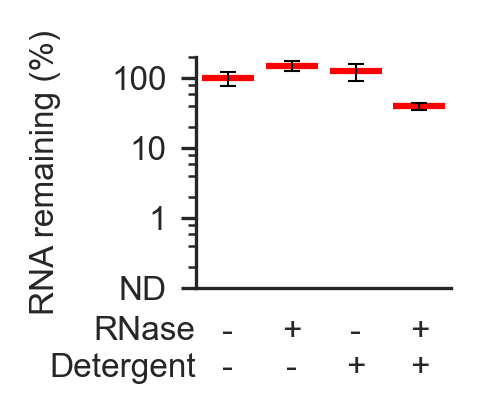

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(1.1,1))

y = data["percent_remaining"]
x = np.arange(len(y))

ax.scatter(x, y, marker="_", s=150, color="r")

ax.errorbar(x=data["description"], y=data["percent_remaining"], 
            yerr=data["percent_remaining_std"],
            fmt="none", color="k", capsize=2, lw=0.5, capthick=0.5)

ax.set_xlim(-0.5, len(data)-0.5)

ax.set_yscale("log")
ax.set_ylim(1e-1, 2e2)

ax.set_xlabel("")
ax.set_ylabel("RNA remaining (%)", labelpad=12)

ax.set_xticks([0, 1, 2, 3])
xticklabels = ["-\n-", "+\n-", "-\n+", "+\n+"]
ax.set_xticklabels(xticklabels)

yticklabels = ["", "ND", "1", "10", "100"]
ax.set_yticklabels(yticklabels)

ax.text(0, -0.12, "RNase", transform=ax.transAxes, ha="right", va="top", size=FONTSIZE)
ax.text(0, -0.28, "Detergent", transform=ax.transAxes, ha="right", va="top", size=FONTSIZE)

ax.tick_params(axis='x', which='both', bottom=False)  # remove xticks

# Set yaxis tick spacing
locmaj = mpl.ticker.LogLocator(base=10,numticks=12) 
ax.yaxis.set_major_locator(locmaj)

locmin = mpl.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())

sns.despine()

save_figure(fig, "RNase_protection_Gag")

## Gag-MCP

In [8]:
# Select and reorder columns
description_ordered = ["GagMCP", "GagMCP +RNase", "GagMCP +Detergent", "GagMCP +RNase +Detergent"]

data = cq.set_index("description").loc[description_ordered].reset_index()
data

,description,Plate,Input,Sample,Biological Set Name,SQ Mean,SQ Std. Dev,data_file,color,frac_remaining,frac_remaining_std,percent_remaining,percent_remaining_std
0,GagMCP,Plate 1,GagMCP,Well 1,GagMCP,2612.765677,441.150344,admin_2022-03-03 18-08-31_CT018863_RPA_GagMCP_...,#9e9ac8,1.000000,0.168844,100.000000,16.884421
1,GagMCP +RNase,Plate 1,GagMCP,Well 3,GagMCP,2800.646620,691.009216,admin_2022-03-03 18-08-31_CT018863_RPA_GagMCP_...,#9e9ac8,1.071909,0.264474,107.190884,26.447424
2,GagMCP +Detergent,Plate 1,GagMCP,Well 2,GagMCP,3739.551948,326.697157,admin_2022-03-03 18-08-31_CT018863_RPA_GagMCP_...,#9e9ac8,1.431262,0.125039,143.126189,12.503883
3,GagMCP +RNase +Detergent,Plate 2,GagMCP,Well 4,GagMCP,140.272787,30.156116,admin_2022-03-03 18-08-31_CT018863_RPA_GagMCP_...,#9e9ac8,0.053687,0.011542,5.368747,1.154184


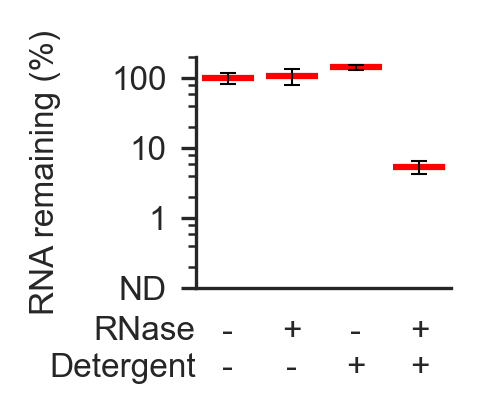

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(1.1,1))

y = data["percent_remaining"]
x = np.arange(len(y))

ax.scatter(x, y, marker="_", s=150, color="r")

ax.errorbar(x=data["description"], y=data["percent_remaining"], 
            yerr=data["percent_remaining_std"],
            fmt="none", color="k", capsize=2, lw=0.5, capthick=0.5)

ax.set_xlim(-0.5, len(data)-0.5)

ax.set_yscale("log")
ax.set_ylim(1e-1, 2e2)

ax.set_xlabel("")
ax.set_ylabel("RNA remaining (%)", labelpad=12)

ax.set_xticks([0, 1, 2, 3])
xticklabels = ["-\n-", "+\n-", "-\n+", "+\n+"]
ax.set_xticklabels(xticklabels)

yticklabels = ["", "ND", "1", "10", "100"]
ax.set_yticklabels(yticklabels)

ax.text(0, -0.12, "RNase", transform=ax.transAxes, ha="right", va="top", size=FONTSIZE)
ax.text(0, -0.28, "Detergent", transform=ax.transAxes, ha="right", va="top", size=FONTSIZE)

ax.tick_params(axis='x', which='both', bottom=False)  # remove xticks

# Set yaxis tick spacing
locmaj = mpl.ticker.LogLocator(base=10,numticks=12) 
ax.yaxis.set_major_locator(locmaj)

locmin = mpl.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())

sns.despine()

save_figure(fig, "RNase_protection_GagMCP")

## GagZip-MCP

In [10]:
# Select and reorder columns
description_ordered = ["GagZipMCP", "GagZipMCP +RNase", "GagZipMCP +Detergent", "GagZipMCP +RNase +Detergent"]

data = cq.set_index("description").loc[description_ordered].reset_index()
data

,description,Plate,Input,Sample,Biological Set Name,SQ Mean,SQ Std. Dev,data_file,color,frac_remaining,frac_remaining_std,percent_remaining,percent_remaining_std
0,GagZipMCP,Plate 3,GagZipMCP,Well 9,GagZipMCP,3101.163284,53.372653,admin_2022-03-12 16-22-22_CT018863_RPA_GagZipM...,#756bb1,1.000000,0.017211,100.000000,1.721053
1,GagZipMCP +RNase,Plate 3,GagZipMCP,Well 11,GagZipMCP,1951.616694,319.227961,admin_2022-03-12 16-22-22_CT018863_RPA_GagZipM...,#756bb1,0.629318,0.102938,62.931762,10.293813
2,GagZipMCP +Detergent,Plate 3,GagZipMCP,Well 10,GagZipMCP,1247.572501,211.646031,admin_2022-03-12 16-22-22_CT018863_RPA_GagZipM...,#756bb1,0.402292,0.068247,40.229178,6.824730
3,GagZipMCP +RNase +Detergent,Plate 3,GagZipMCP,Well 12,GagZipMCP,13.157240,2.685243,admin_2022-03-12 16-22-22_CT018863_RPA_GagZipM...,#756bb1,0.004243,0.000866,0.424268,0.086588


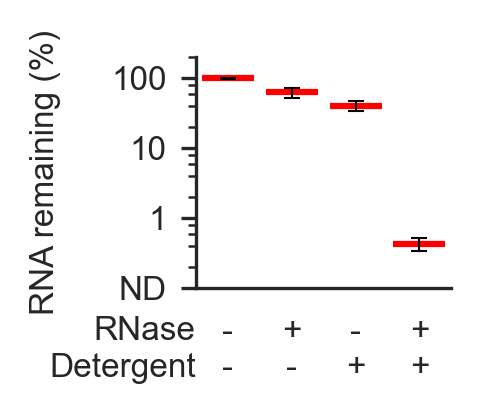

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(1.1,1))

y = data["percent_remaining"]
x = np.arange(len(y))

ax.scatter(x, y, marker="_", s=150, color="r")

ax.errorbar(x=data["description"], y=data["percent_remaining"], 
            yerr=data["percent_remaining_std"],
            fmt="none", color="k", capsize=2, lw=0.5, capthick=0.5)

ax.set_xlim(-0.5, len(data)-0.5)

ax.set_yscale("log")
ax.set_ylim(1e-1, 2e2)

ax.set_xlabel("")
ax.set_ylabel("RNA remaining (%)", labelpad=12)

ax.set_xticks([0, 1, 2, 3])
xticklabels = ["-\n-", "+\n-", "-\n+", "+\n+"]
ax.set_xticklabels(xticklabels)

yticklabels = ["", "ND", "1", "10", "100"]
ax.set_yticklabels(yticklabels)

ax.text(0, -0.12, "RNase", transform=ax.transAxes, ha="right", va="top", size=FONTSIZE)
ax.text(0, -0.28, "Detergent", transform=ax.transAxes, ha="right", va="top", size=FONTSIZE)

ax.tick_params(axis='x', which='both', bottom=False)  # remove xticks

# Set yaxis tick spacing
locmaj = mpl.ticker.LogLocator(base=10,numticks=12) 
ax.yaxis.set_major_locator(locmaj)

locmin = mpl.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())

sns.despine()

save_figure(fig, "RNase_protection_GagZipMCP")

## EPN24-MCP

In [12]:
# Select and reorder columns
description_ordered = ["EPN24MCP", "EPN24MCP +RNase", "EPN24MCP +Detergent", "EPN24MCP +RNase +Detergent"]

data = cq.set_index("description").loc[description_ordered].reset_index()
data

,description,Plate,Input,Sample,Biological Set Name,SQ Mean,SQ Std. Dev,data_file,color,frac_remaining,frac_remaining_std,percent_remaining,percent_remaining_std
0,EPN24MCP,Plate 3,EPN24MCP,Well 9,EPN24MCP,14633.703270,1053.617799,admin_2022-03-12 16-22-22_CT018863_RPA_GagZipM...,#54278f,1.000000,0.071999,100.000000,7.199940
1,EPN24MCP +RNase,Plate 3,EPN24MCP,Well 11,EPN24MCP,15719.708090,1666.093169,admin_2022-03-12 16-22-22_CT018863_RPA_GagZipM...,#54278f,1.074213,0.113853,107.421258,11.385315
2,EPN24MCP +Detergent,Plate 3,EPN24MCP,Well 10,EPN24MCP,3449.673274,1279.633076,admin_2022-03-12 16-22-22_CT018863_RPA_GagZipM...,#54278f,0.235735,0.087444,23.573481,8.744424
3,EPN24MCP +RNase +Detergent,Plate 3,EPN24MCP,Well 12,EPN24MCP,44.404340,5.756282,admin_2022-03-12 16-22-22_CT018863_RPA_GagZipM...,#54278f,0.003034,0.000393,0.303439,0.039336


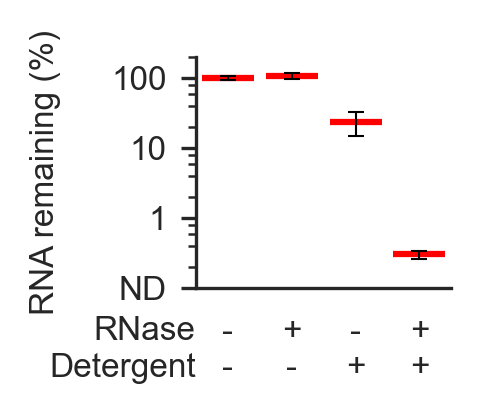

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(1.1,1))

y = data["percent_remaining"]
x = np.arange(len(y))

ax.scatter(x, y, marker="_", s=150, color="r")

ax.errorbar(x=data["description"], y=data["percent_remaining"], 
            yerr=data["percent_remaining_std"],
            fmt="none", color="k", capsize=2, lw=0.5, capthick=0.5)

ax.set_xlim(-0.5, len(data)-0.5)

ax.set_yscale("log")
ax.set_ylim(1e-1, 2e2)

ax.set_xlabel("")
ax.set_ylabel("RNA remaining (%)", labelpad=12)

ax.set_xticks([0, 1, 2, 3])
xticklabels = ["-\n-", "+\n-", "-\n+", "+\n+"]
ax.set_xticklabels(xticklabels)

yticklabels = ["", "ND", "1", "10", "100"]
ax.set_yticklabels(yticklabels)

ax.text(0, -0.12, "RNase", transform=ax.transAxes, ha="right", va="top", size=FONTSIZE)
ax.text(0, -0.28, "Detergent", transform=ax.transAxes, ha="right", va="top", size=FONTSIZE)

ax.tick_params(axis='x', which='both', bottom=False)  # remove xticks

# Set yaxis tick spacing
locmaj = mpl.ticker.LogLocator(base=10,numticks=12) 
ax.yaxis.set_major_locator(locmaj)

locmin = mpl.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())

sns.despine()

save_figure(fig, "RNase_protection_EPN24MCP")

## mRNA (not packaged) (negative control)

In [14]:
# Select and reorder columns
description_ordered = ["Spike-in", "Spike-in +RNase", "Spike-in +Detergent", "Spike-in +RNase +Detergent"]

data = cq.set_index("description").loc[description_ordered].reset_index()
data

,description,Plate,Input,Sample,Biological Set Name,SQ Mean,SQ Std. Dev,data_file,color,frac_remaining,frac_remaining_std,percent_remaining,percent_remaining_std
0,Spike-in,Plate 1,Spike-in mRNA,Well 5,SpikeIn,30209.202580,2431.882234,admin_2022-02-26 15-17-09_CT018863_RPA_mCh_Spike,#969696,1.000000,0.080501,100.000000,8.050137
1,Spike-in +RNase,Plate 1,Spike-in mRNA,Well 7,SpikeIn,90.066702,14.941357,admin_2022-02-26 15-17-09_CT018863_RPA_mCh_Spike,#969696,0.002981,0.000495,0.298143,0.049460
2,Spike-in +Detergent,Plate 1,Spike-in mRNA,Well 6,SpikeIn,34735.988980,8282.963859,admin_2022-02-26 15-17-09_CT018863_RPA_mCh_Spike,#969696,1.149848,0.274187,114.984793,27.418678
3,Spike-in +RNase +Detergent,Plate 1,Spike-in mRNA,Well 8,SpikeIn,69.612233,14.819125,admin_2022-02-26 15-17-09_CT018863_RPA_mCh_Spike,#969696,0.002304,0.000491,0.230434,0.049055


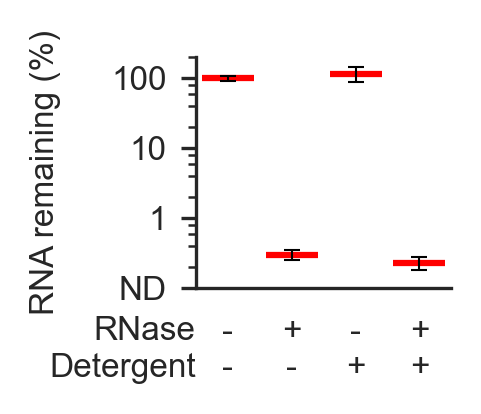

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(1.1,1))

y = data["percent_remaining"]
x = np.arange(len(y))

ax.scatter(x, y, marker="_", s=150, color="r")

ax.errorbar(x=data["description"], y=data["percent_remaining"], 
            yerr=data["percent_remaining_std"],
            fmt="none", color="k", capsize=2, lw=0.5, capthick=0.5)

ax.set_xlim(-0.5, len(data)-0.5)

ax.set_yscale("log")
ax.set_ylim(1e-1, 2e2)

ax.set_xlabel("")
ax.set_ylabel("RNA remaining (%)", labelpad=12)

ax.set_xticks([0, 1, 2, 3])
xticklabels = ["-\n-", "+\n-", "-\n+", "+\n+"]
ax.set_xticklabels(xticklabels)

yticklabels = ["", "ND", "1", "10", "100"]
ax.set_yticklabels(yticklabels)

ax.text(0, -0.12, "RNase", transform=ax.transAxes, ha="right", va="top", size=FONTSIZE)
ax.text(0, -0.28, "Detergent", transform=ax.transAxes, ha="right", va="top", size=FONTSIZE)

ax.tick_params(axis='x', which='both', bottom=False)  # remove xticks

# Set yaxis tick spacing
locmaj = mpl.ticker.LogLocator(base=10,numticks=12) 
ax.yaxis.set_major_locator(locmaj)

locmin = mpl.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())

sns.despine()

save_figure(fig, "RNase_protection_SpikeInRNA")